In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [31]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [72]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = last_date[0]
last_date

'2017-08-23'

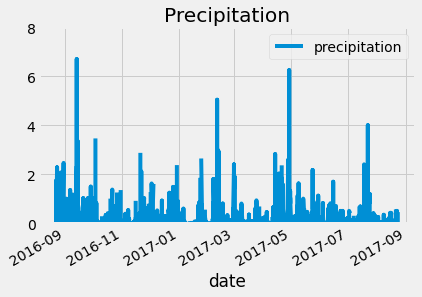

In [125]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
precip = session.query(Measurement.date).filter(Measurement.date >= last_date)

# Calculate the date 1 year ago from today
prev_year = dt.datetime.strptime(last_date, "%Y-%m-%d")- dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
precip_scores=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_scores, columns = ["date", "precipitation"])
precip_df["date"] = pd.to_datetime(precip_df["date"], format = "%Y-%m-%d")
precip_df.set_index("date", inplace = True)

# Sort the dataframe by date

precip_df = precipitation_df.sort_values(by="date", ascending = True)
precip_df

# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot(title="Precipitation")
plt.ylim(0,8)
plt.savefig("Images/Precipitation.png", bbox_inches="tight")
plt.show()

In [126]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [127]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [128]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [129]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
most_active

most_active_high = session.query(func.max(Measurement.tobs)).\
                    filter(Measurement.station == most_active).all()
most_active_low = session.query(func.min(Measurement.tobs)).\
                    filter(Measurement.station == most_active).all()
most_active_avg = session.query(func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active).all()

print(f'The highest temperature observed at station {most_active} was {most_active_high[0]}')
print(f'The lowest temperature observed at station {most_active} was {most_active_low[0]}')
print(f'The average temperature observed at station {most_active} was {most_active_avg[0]}')


The highest temperature observed at station USC00519281 was (85.0,)
The lowest temperature observed at station USC00519281 was (54.0,)
The average temperature observed at station USC00519281 was (71.66378066378067,)


<AxesSubplot:title={'center':'Frequency V Temp'}, ylabel='Frequency'>

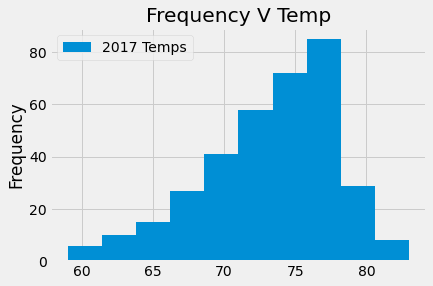

In [132]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).\
            filter(Measurement.date >= prev_year).\
            filter(Measurement.station == most_active)

temp_data = pd.DataFrame(temp_data, columns=['2017 Temps'])



temp_data.plot.hist(title = 'Frequency V Temp')


# Close session

In [133]:
# Close Session
session.close()